In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
import openpyxl

In [3]:
# read file
df = pd.read_excel(r"C:/Users/Lukas Wolf/Documents/projects/eda_erasmus/Erasmus-KA1-Mobility-Data-2022.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364397 entries, 0 to 364396
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Project Reference          364397 non-null  object
 1   Academic Year              364397 non-null  object
 2   Mobility Start Year/Month  364397 non-null  object
 3   Mobility Duration          364397 non-null  int64 
 4   Activity (mob)             364397 non-null  object
 5   Field                      364397 non-null  object
 6   Field of Education         364397 non-null  object
 7   Participant Country        364397 non-null  object
 8   Education Level            364397 non-null  object
 9   Participant Gender         364397 non-null  object
 10  Participant Profile        364397 non-null  object
 11  Fewer Opportunities        364397 non-null  object
 12  Participant Age            364397 non-null  object
 13  Sending Country            364397 non-null  

In [6]:
df.head(5)

,Project Reference,Academic Year,Mobility Start Year/Month,Mobility Duration,Activity (mob),Field,Field of Education,Participant Country,Education Level,Participant Gender,Participant Profile,Fewer Opportunities,Participant Age,Sending Country,Sending City,Sending Organization,Receiving Country,Receiving City,Receiving Organization,Actual Participants
0,2019-1-AT01-KA101-050747,2021-2022,2022-04,5,Structured Courses/Training Events,School Education,"Education, not further defined",Austria,??? - ? Unknown ?,Female,Staff,No,48,AT - Austria,St. Johann,"Tourismusschulen ""Am Wilden Kaiser"" Höhere Bun...",IT - Italy,Rom,Scuola Leonardo da Vinci Roma srl,1
1,2019-1-AT01-KA101-050750,2021-2022,2022-08,6,Structured Courses/Training Events,School Education,Teacher training without subject specialization,Austria,??? - ? Unknown ?,Male,Staff,No,43,AT - Austria,Weiz,HTL Weiz,PT - Portugal,Madeira,Institut für europäische Lehrerfortbildung UG ...,1
2,2019-1-AT01-KA101-050767,2021-2022,2022-02,5,Structured Courses/Training Events,School Education,Teacher training without subject specialization,Austria,??? - ? Unknown ?,Female,Staff,No,26,AT - Austria,Wels,BRG Wels Wallererstraße,MT - Malta,Valetta,Easy School of Languages,1
3,2019-1-AT01-KA101-050767,2021-2022,2022-04,5,Job Shadowing,School Education,Teacher training without subject specialization,Austria,??? - ? Unknown ?,Female,Staff,No,27,AT - Austria,Wels,BRG Wels Wallererstraße,ES - Spain,Monzon,Salesianos Monzon,1
4,2019-1-AT01-KA101-050767,2021-2022,2022-04,5,Job Shadowing,School Education,Teacher training without subject specialization,Austria,??? - ? Unknown ?,Female,Staff,No,38,AT - Austria,Wels,BRG Wels Wallererstraße,ES - Spain,Monzon,Salesianos Monzon,1


In [7]:
df.columns

Index(['Project Reference', 'Academic Year', 'Mobility Start Year/Month',
       'Mobility Duration', 'Activity (mob)', 'Field', 'Field of Education',
       'Participant Country', 'Education Level', 'Participant Gender',
       'Participant Profile', 'Fewer Opportunities', 'Participant Age',
       'Sending Country', 'Sending City', 'Sending Organization',
       'Receiving Country', 'Receiving City', 'Receiving Organization',
       'Actual Participants '],
      dtype='object')

In [110]:
# check for duplicated columns 
df.duplicated().value_counts()
df2 = df.drop_duplicates()

In [114]:
df2.groupby(['Actual Participants '])['Actual Participants '].sum()

Actual Participants 
1     325270
2      54182
3      20004
4      10196
5       5660
6       3600
7       2310
8       1760
9       1332
10       900
11       528
12       348
13       273
14       238
15       195
16       160
17        85
18        90
19        76
20        40
21        63
22        88
23        23
24        96
25        50
29        29
30        30
34        34
38        38
57        57
72        72
Name: Actual Participants , dtype: int64

In [115]:
# include necessary/interesting columns only
df2 = df[[#'Project Reference', 'Academic Year', 
 'Mobility Start Year/Month','Mobility Duration', 
 #'Activity (mob)', 
'Field', 
#'Field of Education',
'Participant Country', 
#'Education Level', 
'Participant Gender','Participant Profile', 
#'Fewer Opportunities', 
'Participant Age',
'Sending Country', 'Sending City', 'Sending Organization',
       'Receiving Country', 'Receiving City', 'Receiving Organization',
       'Actual Participants ']]

In [116]:
# renaming columns
df2 = df2.rename(columns={'Mobility Start Year/Month': 'mobility_start', 
                    'Mobility Duration': 'mobility_duration',
                    'Field': 'field',
                    'Participant Country': 'participant_country',
                    'Participant Gender': 'participant_gender',
                    'Participant Profile': 'participant_profile',
                    'Participant Age': 'participant_age',
                    'Sending Country': 'sending_country',
                    'Sending City': 'sending_city',
                    'Sending Organization': 'sending_organization',
                    'Receiving Country': 'receiving_country',
                    'Receiving City': 'receiving_city',
                    'Receiving Organization': 'receiving_organization',
                    'Actual Participants ': 'actual_participants'})

In [117]:
df2.columns

Index(['mobility_start', 'mobility_duration', 'field', 'participant_country',
       'participant_gender', 'participant_profile', 'participant_age',
       'sending_country', 'sending_city', 'sending_organization',
       'receiving_country', 'receiving_city', 'receiving_organization',
       'actual_participants'],
      dtype='object')

In [78]:
pd.set_option('display.max_rows', 160)

In [118]:
# transform and check entries for age
df2['part_age_adj'] = pd.to_numeric(df2['participant_age'],errors='coerce')
df2.groupby(['part_age_adj'])[['actual_participants']].sum().reset_index()
#df2['part_age_adj'].value_counts()

,part_age_adj,actual_participants
0,-62.0,1
1,-1.0,1
2,0.0,6
3,1.0,6
4,2.0,8
...,...,...
149,1817.0,1
150,1818.0,1
151,1819.0,1
152,1822.0,2


In [119]:
# include age between 13 and 70 only
df2 = df2.query('part_age_adj >= 13 & part_age_adj <= 70')
df2.groupby(['part_age_adj'])[['actual_participants']].sum().reset_index()

,part_age_adj,actual_participants
0,13.0,873
1,14.0,1996
2,15.0,4832
3,16.0,14923
4,17.0,30020
5,18.0,31273
6,19.0,23389
7,20.0,28168
8,21.0,30303
9,22.0,24703


In [122]:
# sum up number of participants per attribute group
df2 = df2.groupby(['mobility_start', 'mobility_duration', 'field', 'participant_country',
       'participant_gender', 'participant_profile', 'part_age_adj',
       'sending_country', 'sending_city', 'sending_organization',
       'receiving_country', 'receiving_city', 'receiving_organization'])[['actual_participants']].sum().reset_index()
df2.head(5)
df2['actual_participants'].value_counts()
#df2['actual_participants'].sum()

actual_participants
1     261790
2      22595
3       5938
4       2418
5       1192
6        663
7        370
8        277
9        178
10       111
11        68
12        37
13        27
14        24
15        20
19        12
16        12
17         7
21         5
18         4
22         4
24         3
20         2
26         1
29         1
30         1
34         1
72         1
57         1
27         1
50         1
23         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Participants by Age')

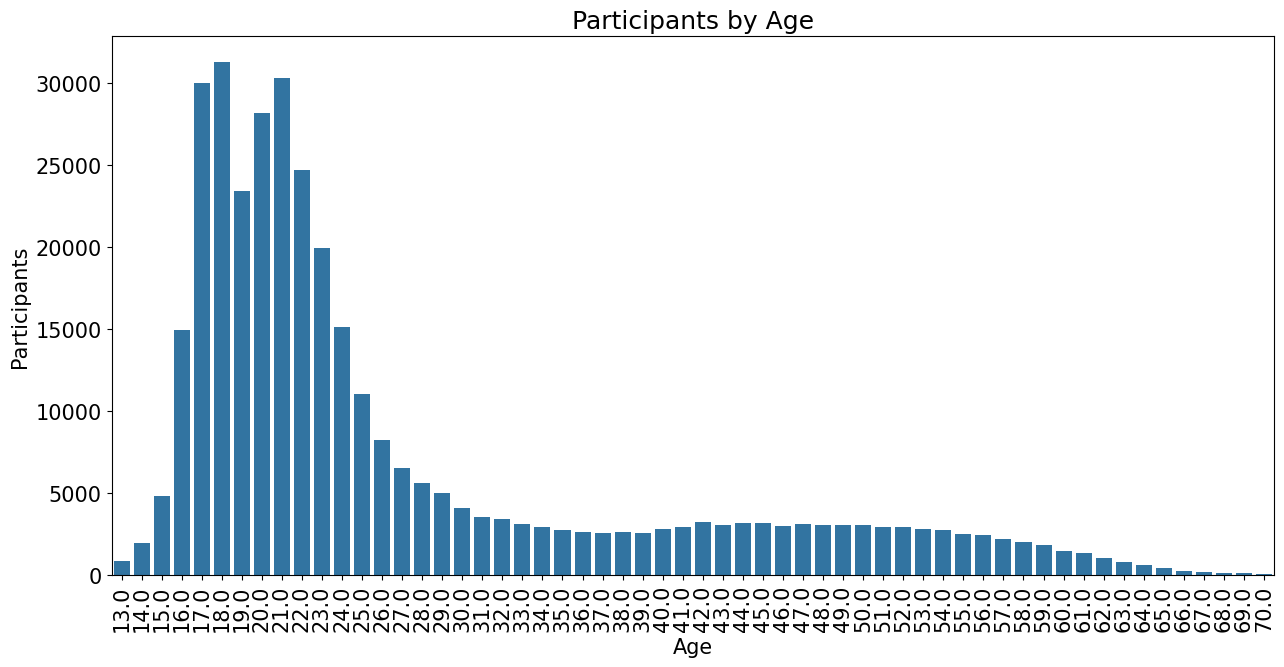

In [142]:
# plot for participants by age
ag = df2.groupby(['part_age_adj'])[['actual_participants']].sum().reset_index()
ag
agh = sns.barplot(ag,x='part_age_adj',y='actual_participants')
for item in agh.get_xticklabels():
    item.set_rotation(90)
agh.set_xlabel('Age')
agh.set_ylabel('Participants')
agh.set_title('Participants by Age')

Text(0.5, 1.0, 'Age Distribution by Profile')

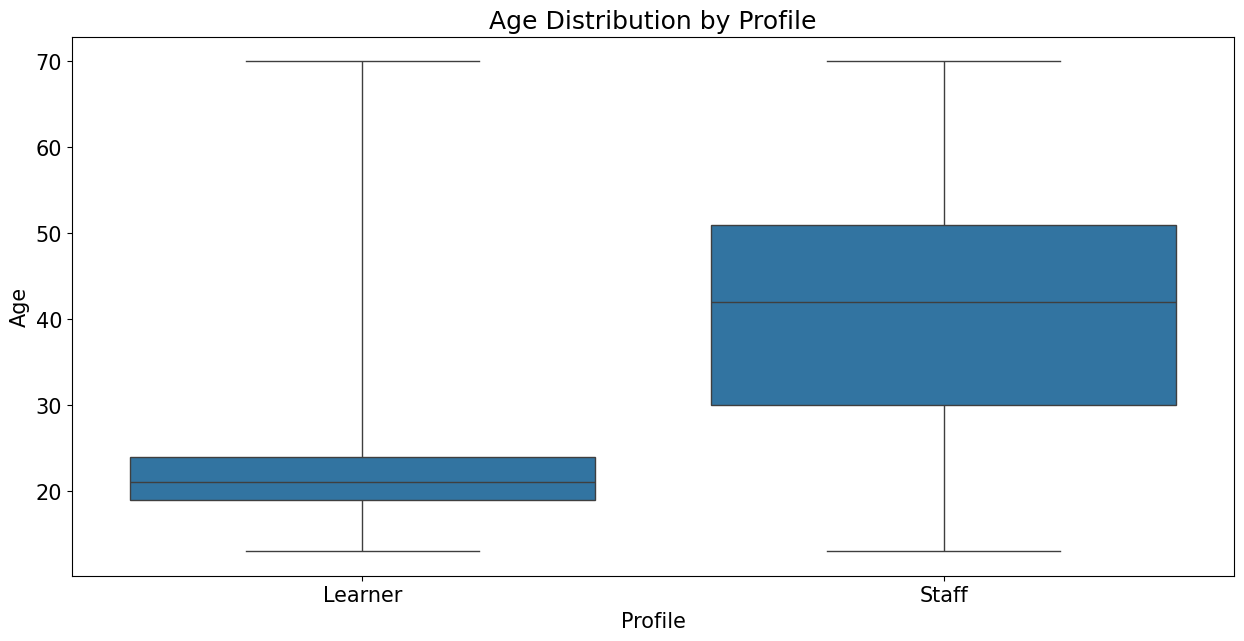

In [153]:
# boxplot age by profile
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15,7)
pagp = sns.boxplot(data=df2, y='part_age_adj', x='participant_profile',whis=(0, 100))
pagp.set_xlabel('Profile')
pagp.set_ylabel('Age')
pagp.set_title('Age Distribution by Profile')

Text(0.5, 1.0, 'Participants by Gender')

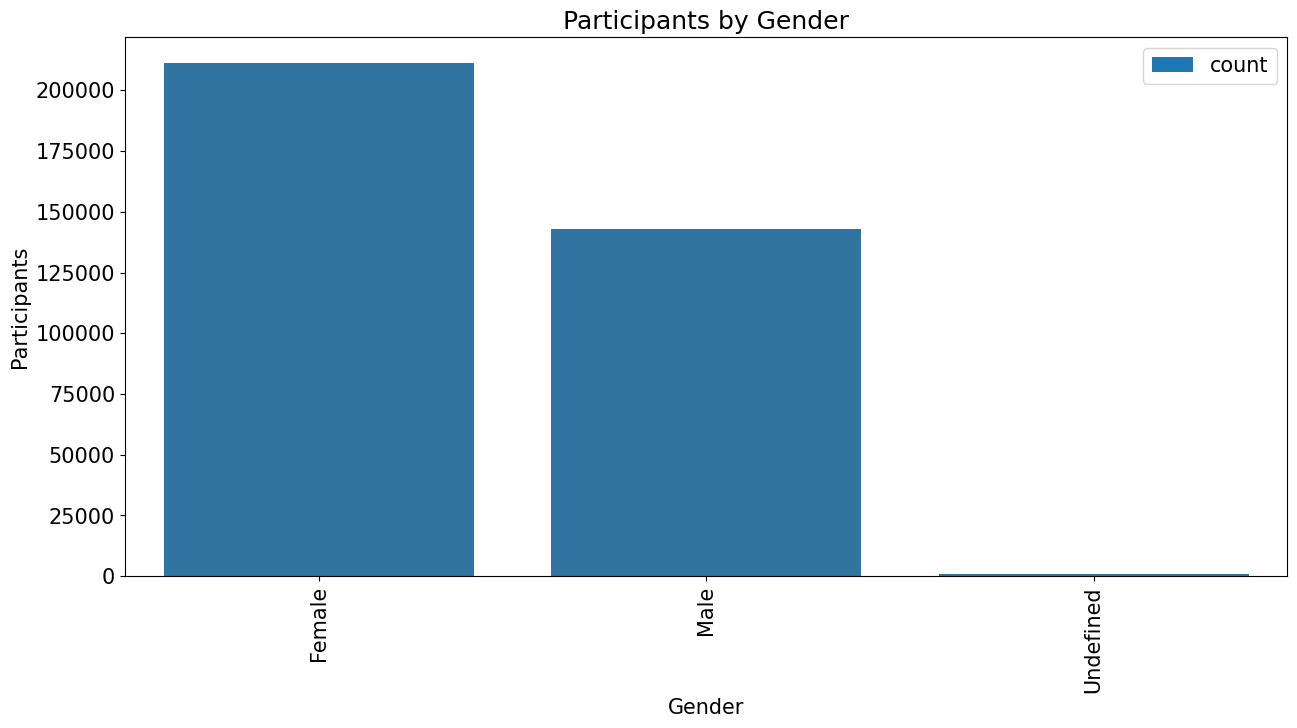

In [143]:
# bar chart participants per gender
pg = df2.groupby(['participant_gender'])[['actual_participants']].sum().reset_index()
pgp = sns.barplot(pg,x='participant_gender',y='actual_participants')
pgp.set_xlabel('Gender')
pgp.set_ylabel('Participants')
pgp.set_title('Participants by Gender')
        

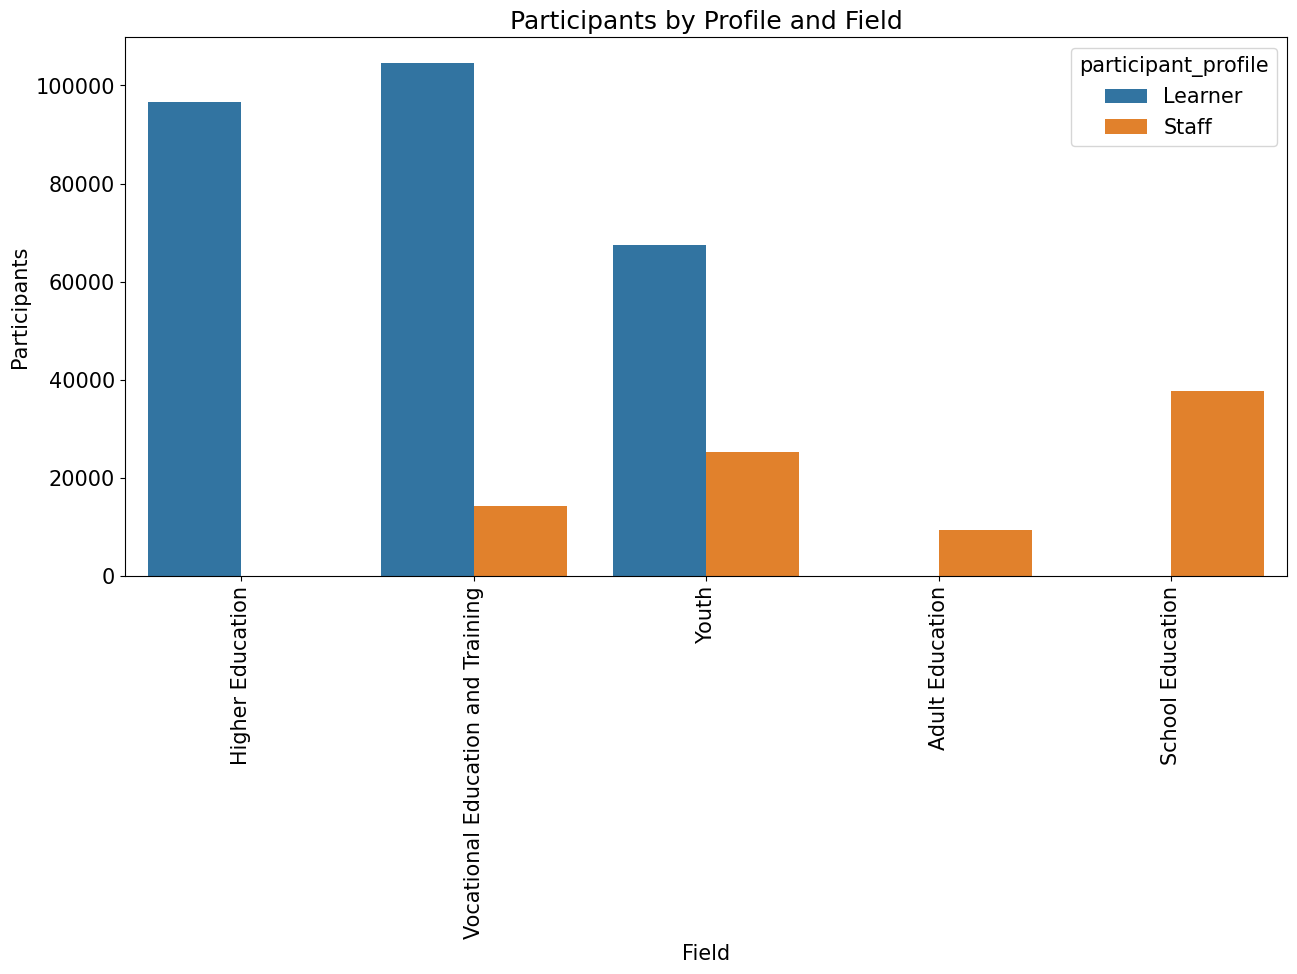

In [151]:
# bar chart participants by profile and field
ppf = df2.groupby(['participant_profile','field'])[['actual_participants']].sum().reset_index()
ppfp = sns.barplot(ppf,x='field',y='actual_participants',hue='participant_profile')
ppfp.set_xlabel('Field')
ppfp.set_ylabel('Participants')
ppfp.set_title('Participants by Profile and Field')
for item in ppfp.get_xticklabels():
    item.set_rotation(90)

In [80]:
# focus on main sending and receiving countries
country_participants = df2.groupby(['sending_country', 'receiving_country'])[['actual_participants']].sum().reset_index()
country_participants_1000 = country_participants.query('actual_participants > 1000')
country_participants_1000= country_participants_1000.pivot(index='sending_country',columns='receiving_country',values='actual_participants').fillna(0)
country_participants_1000

receiving_country,AT - Austria,BE - Belgium,CZ - Czech Republic,DE - Germany,EL - Greece,ES - Spain,FI - Finland,FR - France,HU - Hungary,IE - Ireland,IT - Italy,MT - Malta,NL - Netherlands,PL - Poland,PT - Portugal,RO - Romania,TR - Turkey,UK - United Kingdom
sending_country,,,,,,,,,,,,,,,,,,
BE - Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1078.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CZ - Czech Republic,0.0,0.0,0.0,0.0,0.0,1019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE - Germany,1458.0,0.0,0.0,1872.0,0.0,3416.0,0.0,1439.0,0.0,2747.0,2036.0,1173.0,0.0,0.0,0.0,0.0,0.0,3659.0
EL - Greece,0.0,0.0,0.0,0.0,0.0,2328.0,0.0,0.0,0.0,0.0,1715.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ES - Spain,0.0,0.0,0.0,2137.0,0.0,2196.0,1141.0,2267.0,0.0,1585.0,7716.0,0.0,0.0,1349.0,2628.0,0.0,0.0,1726.0
FR - France,0.0,1873.0,0.0,1922.0,0.0,5830.0,0.0,1206.0,0.0,3496.0,2436.0,2093.0,0.0,0.0,1719.0,0.0,0.0,1396.0
HU - Hungary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IT - Italy,0.0,1088.0,0.0,1859.0,1002.0,8419.0,0.0,2232.0,0.0,2752.0,2851.0,2472.0,0.0,0.0,1264.0,0.0,0.0,1020.0
NL - Netherlands,0.0,0.0,0.0,1467.0,0.0,3547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0


<Axes: xlabel='receiving_country', ylabel='sending_country'>

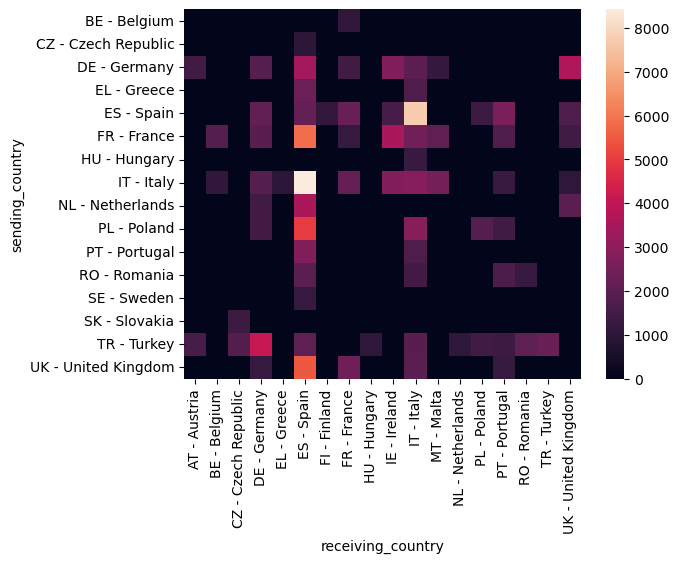

In [39]:
# heatmap sending and receiving countries
sns.heatmap(country_participants_1000)